##### Librerias

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Realizar los distintos test
# ------------------------------------------------------------------------------

from scipy.stats import ttest_ind, norm, chi2_contingency, f_oneway
from sklearn.linear_model import LinearRegression

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

import scipy.stats as stats

pd.set_option('display.max_columns', None) #  poder visualizar todas las columnas de los DataFrames

pd.set_option('display.float_format', '{:.2f}'.format) # convierte los floar en otro formato con dos decimales.

#### Fase 1: Exploración y Limpieza

In [2]:
#Lectura del CSV y visualización de los 5 primeros. 
df_flight = pd.read_csv("./datos/Customer_Flight _Activity.csv", index_col = 0)
df_flight.head()

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.00,0,0
100102,2017,1,10,4,14,2030,203.00,0,0
100140,2017,1,6,0,6,1200,120.00,0,0
100214,2017,1,0,0,0,0,0.00,0,0
100272,2017,1,0,0,0,0,0.00,0,0


In [3]:
#Lectura del CSV y visualización de los 5 primeros. 
df_loyalty = pd.read_csv("./datos/Customer_Loyalty_History.csv", index_col = 0)
df_loyalty.head()

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.00,1.00
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.00,Married,Star,3842.79,Standard,2014,10,NaN,NaN


### Exploración Inicial

In [4]:
df_flight.shape

(405624, 9)

In [5]:
df_loyalty.shape

(16737, 15)

In [6]:
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405624 entries, 100018 to 999986
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Year                         405624 non-null  int64  
 1   Month                        405624 non-null  int64  
 2   Flights Booked               405624 non-null  int64  
 3   Flights with Companions      405624 non-null  int64  
 4   Total Flights                405624 non-null  int64  
 5   Distance                     405624 non-null  int64  
 6   Points Accumulated           405624 non-null  float64
 7   Points Redeemed              405624 non-null  int64  
 8   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 30.9 MB


In [7]:
df_flight["Points Accumulated"].unique()

array([152.  , 203.  , 120.  , ...,  18.75, 601.  , 626.  ])

In [8]:
df_flight["Dollar Cost Points Redeemed"].value_counts()

0     381443
36      1037
38      1001
40       993
42       983
39       943
44       923
41       913
37       887
43       877
35       852
34       844
32       817
33       800
45       779
30       772
46       753
31       722
47       675
48       638
28       598
29       596
50       595
49       568
52       482
51       435
27       421
54       402
26       379
53       377
56       365
55       343
57       274
58       265
60       260
59       219
25       209
61       175
63       175
62       155
64       152
24       110
66       106
65        90
68        85
67        68
70        38
69        28
71         2
Name: Dollar Cost Points Redeemed, dtype: int64

In [9]:
df_loyalty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16737 entries, 480934 to 652627
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             16737 non-null  object 
 1   Province            16737 non-null  object 
 2   City                16737 non-null  object 
 3   Postal Code         16737 non-null  object 
 4   Gender              16737 non-null  object 
 5   Education           16737 non-null  object 
 6   Salary              12499 non-null  float64
 7   Marital Status      16737 non-null  object 
 8   Loyalty Card        16737 non-null  object 
 9   CLV                 16737 non-null  float64
 10  Enrollment Type     16737 non-null  object 
 11  Enrollment Year     16737 non-null  int64  
 12  Enrollment Month    16737 non-null  int64  
 13  Cancellation Year   2067 non-null   float64
 14  Cancellation Month  2067 non-null   float64
dtypes: float64(4), int64(2), object(9)
memory usage

In [10]:
df_loyalty["Province"].unique()

array(['Ontario', 'Alberta', 'British Columbia', 'Quebec', 'Yukon',
       'New Brunswick', 'Manitoba', 'Nova Scotia', 'Saskatchewan',
       'Newfoundland', 'Prince Edward Island'], dtype=object)

In [11]:
df_loyalty["City"].unique()

array(['Toronto', 'Edmonton', 'Vancouver', 'Hull', 'Whitehorse',
       'Trenton', 'Montreal', 'Dawson Creek', 'Quebec City',
       'Fredericton', 'Ottawa', 'Tremblant', 'Calgary', 'Thunder Bay',
       'Whistler', 'Peace River', 'Winnipeg', 'Sudbury', 'West Vancouver',
       'Halifax', 'London', 'Regina', 'Kelowna', "St. John's", 'Victoria',
       'Kingston', 'Banff', 'Moncton', 'Charlottetown'], dtype=object)

In [12]:
df_loyalty["Salary"].value_counts()

101933.00    23
62283.00     14
61809.00     14
51573.00     14
64001.00     13
             ..
95907.00      1
72440.00      1
88633.00      1
100572.00     1
-57297.00     1
Name: Salary, Length: 5890, dtype: int64

In [13]:
df_loyalty["Education"].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [14]:
df_loyalty["CLV"].unique()

array([ 3839.14,  3839.61,  3839.75, ..., 44771.3 , 50568.26, 61134.68])

In [15]:
df_loyalty["Cancellation Year"].unique()

array([  nan, 2018., 2015., 2017., 2014., 2016., 2013.])

In [16]:
df_loyalty["Cancellation Month"].unique()

array([nan,  1., 12.,  4.,  2.,  7., 11.,  5.,  6., 10.,  8.,  9.,  3.])

In [17]:
df_flight.duplicated().sum()

228705

In [48]:
# Gestionar filas duplicadas del df_flight

# Verificar filas completamente duplicadas en el DataFrame
filas_duplicadas_completas = df_flight.duplicated(keep=False)

# Ahora, filas_duplicadas_completas contiene una Serie booleana que marca todas las filas duplicadas como True

# Contar el número total de filas completamente duplicadas
total_filas_duplicadas_completas = filas_duplicadas_completas.sum()

# Imprimir el número total de filas completamente duplicadas
print("Número total de filas completamente duplicadas:", total_filas_duplicadas_completas)

# Mostrar las filas completamente duplicadas
duplicados_completos = df_flight[filas_duplicadas_completas]
print(duplicados_completos)



Número total de filas completamente duplicadas: 253332
                Year  Month  Flights Booked  Flights with Companions  \
Loyalty Number                                                         
100018          2017      1               3                        0   
100140          2017      1               6                        0   
100214          2017      1               0                        0   
100272          2017      1               0                        0   
100301          2017      1               0                        0   
...              ...    ...             ...                      ...   
999891          2018     12               0                        0   
999902          2018     12               0                        0   
999911          2018     12               0                        0   
999982          2018     12               0                        0   
999986          2018     12               0                        0   

        

In [17]:
df_loyalty.duplicated().sum()

0

In [18]:
# Ver nulos  - Serie vacía , no hay nulos.
nulos_flight =df_flight.isnull().sum()[df_flight.isnull().sum() > 0] /df_flight.shape[0]
nulos_flight

Series([], dtype: float64)

In [19]:
# Ver nulos  - 88% en 2 columnas son nulos.
nulos_loy =df_loyalty.isnull().sum()[ df_loyalty.isnull().sum() > 0] /df_loyalty.shape[0]
nulos_loy

Salary               0.25
Cancellation Year    0.88
Cancellation Month   0.88
dtype: float64

In [20]:
display(df_flight.describe().T)

,count,mean,std,min,25%,50%,75%,max
Year,405624.00,2017.50,0.50,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.00,6.50,3.45,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.00,4.12,5.23,0.00,0.00,1.00,8.00,21.00
Flights with Companions,405624.00,1.03,2.08,0.00,0.00,0.00,1.00,11.00
Total Flights,405624.00,5.15,6.52,0.00,0.00,1.00,10.00,32.00
Distance,405624.00,1208.88,1433.16,0.00,0.00,488.00,2336.00,6293.00
Points Accumulated,405624.00,123.69,146.60,0.00,0.00,50.00,239.00,676.50
Points Redeemed,405624.00,30.70,125.49,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,405624.00,2.48,10.15,0.00,0.00,0.00,0.00,71.00


In [21]:
display(df_loyalty.describe().T)
print(".............")
display(df_loyalty.describe(include = "O").T)

,count,mean,std,min,25%,50%,75%,max
Salary,12499.00,79245.61,35008.30,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.00,7988.90,6860.98,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.00,2015.25,1.98,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.00,6.67,3.40,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.00,2016.50,1.38,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.00,6.96,3.46,1.00,4.00,7.00,10.00,12.00


.............


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


In [22]:
# Columnas

print(f"los nombres de columnas que tenemos en el df flight son \n\n{df_flight.columns}")
print("-------------------------------------------------------------------")


print(f"los nombres de columnas que tenemos en el df_loyalty son \n\n {df_loyalty.columns}")
print("-------------------------------------------------------------------")

los nombres de columnas que tenemos en el df flight son 

Index(['Year', 'Month', 'Flights Booked', 'Flights with Companions',
       'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')
-------------------------------------------------------------------
los nombres de columnas que tenemos en el df_loyalty son 

 Index(['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')
-------------------------------------------------------------------


In [25]:
# Unir con join - para unir dataframes por el índice. ( Loyalty number)

df_join = df_loyalty.join(df_flight, on ="Loyalty Number")
df_join.head()

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.00,0,0
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.00,0,0
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.00,0,0
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.00,0,0
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.00,465,38


In [26]:
# Etiqueta de índice , la cambiamos renombramos a columna. 
df_join = df_join.rename_axis('Loyalty Number').reset_index()

In [27]:
df_join.shape

(405624, 25)

##### Limpieza de datos

In [28]:
df_join.head(1)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.00,0,0


In [29]:
# Limpiar columnas, espacios y a minusculas. 
columnas = [col.lower().replace(" ", "_") for col in df_join.columns]
df_join.columns = columnas
df_join.columns

Index(['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'salary', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'cancellation_year', 'cancellation_month', 'year', 'month',
       'flights_booked', 'flights_with_companions', 'total_flights',
       'distance', 'points_accumulated', 'points_redeemed',
       'dollar_cost_points_redeemed'],
      dtype='object')

In [30]:
#Ver tipo de datos y valorar cambios.
df_join.dtypes

loyalty_number                   int64
country                         object
province                        object
city                            object
postal_code                     object
gender                          object
education                       object
salary                         float64
marital_status                  object
loyalty_card                    object
clv                            float64
enrollment_type                 object
enrollment_year                  int64
enrollment_month                 int64
cancellation_year              float64
cancellation_month             float64
year                             int64
month                            int64
flights_booked                   int64
flights_with_companions          int64
total_flights                    int64
distance                         int64
points_accumulated             float64
points_redeemed                  int64
dollar_cost_points_redeemed      int64
dtype: object

In [30]:
# for columna in df_join.columns:
#     # Verificar si el tipo de datos de la columna es float
#     if df_join[columna].dtype == 'float64':
#         # Convertir el tipo de datos de float a int
#         df_join[columna] = df_join[columna].astype(int)

In [31]:
# Ver % nulos y valorar cambios.

df_join.isnull().sum()[df_join.isnull().sum() > 0] / df_join.shape[0]

salary               0.25
cancellation_year    0.88
cancellation_month   0.88
dtype: float64

In [32]:
df_join["salary"].unique()

array([ 83236.,     nan, 103495., ...,  76178.,  91970., -57297.])

In [33]:
# Negativos valores negativos en Salary 

mask_negativos = df_join['salary'] < 0
df_join.loc[mask_negativos, 'salary'] = np.nan


In [33]:
# Lista de nombres de columnas con valores nulos, ¿pasar a desconocido? ¿ponerlos en 0? 
columnas_nan = ['salary', 'cancellation_year', 'cancellation_month']

# Iterar sobre las columnas y reemplazar los valores NaN con "Desconocido"
for columna in columnas_nan:
    df_join[columna].fillna('unkwown', inplace=True)

In [34]:
df_join.isnull().sum()

loyalty_number                 0
country                        0
province                       0
city                           0
postal_code                    0
gender                         0
education                      0
salary                         0
marital_status                 0
loyalty_card                   0
clv                            0
enrollment_type                0
enrollment_year                0
enrollment_month               0
cancellation_year              0
cancellation_month             0
year                           0
month                          0
flights_booked                 0
flights_with_companions        0
total_flights                  0
distance                       0
points_accumulated             0
points_redeemed                0
dollar_cost_points_redeemed    0
dtype: int64

In [27]:
#Columnas numericas con valores nulos, ¿pasar a 0?

columnas_nan = ['year','month','flights_booked','flights_with_companions','total_flights','distance','points_accumulated','points_redeemed','dollar_cost_points_redeemed']

for columna in columnas_nan:
    df_join[columna].fillna(0, inplace=True)

In [ ]:
# Define una función lambda para convertir la primera letra de una cadena a minúscula
convertir_minuscula = lambda x: x.lower() if isinstance(x, str) and x[0].isupper() else x

# Aplica la función lambda a cada valor del DataFrame usando applymap()
df_transformado = df.applymap(convertir_minuscula)

# Visualiza el DataFrame transformado
print(df_transformado)

In [38]:
df_join.sample(10)

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
157049,131001,Canada,Ontario,Ottawa,K1F 2R2,Male,College,Desconocido,Single,Star,7659,Standard,2015,5,Desconocido,Desconocido,2018,6,2,2,4,1016,101,0,0
145984,189817,Canada,British Columbia,Vancouver,V6E 3Z3,Male,Bachelor,61402.00,Divorced,Star,5396,Standard,2013,8,Desconocido,Desconocido,2018,7,19,9,28,2156,215,0,0
28010,128534,Canada,British Columbia,West Vancouver,V6V 8Z3,Male,College,Desconocido,Single,Aurora,8501,Standard,2013,6,Desconocido,Desconocido,2018,2,1,0,1,2176,325,0,0
42184,524055,Canada,Ontario,Toronto,M2P 4F6,Male,Bachelor,93982.00,Single,Aurora,22986,Standard,2012,11,Desconocido,Desconocido,2018,2,6,0,6,1806,270,0,0
111658,600785,Canada,New Brunswick,Moncton,E1A 2A7,Male,Bachelor,52775.00,Married,Star,2432,Standard,2016,7,Desconocido,Desconocido,2017,1,10,0,10,3340,334,0,0
161628,296997,Canada,Manitoba,Winnipeg,R3R 3T4,Male,Bachelor,101933.00,Married,Star,8564,Standard,2013,11,Desconocido,Desconocido,2017,9,8,4,12,1248,124,0,0
126750,143981,Canada,Quebec,Montreal,H2T 2J6,Male,Bachelor,100918.00,Divorced,Star,2786,Standard,2014,12,Desconocido,Desconocido,2018,9,14,0,14,4074,407,0,0
2467,137845,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,Bachelor,88445.00,Married,Star,4277,Standard,2013,6,Desconocido,Desconocido,2018,7,19,5,24,3672,367,466,38
162596,119198,Canada,Quebec,Hull,J8Y 3Z5,Male,College,Desconocido,Divorced,Star,2659,2018 Promotion,2018,4,Desconocido,Desconocido,2017,4,1,1,2,2296,229,0,0
116357,107461,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,Desconocido,Married,Star,2519,Standard,2015,2,Desconocido,Desconocido,2018,3,2,0,2,208,21,0,0


In [67]:
# Hay clientes duplicados, donde la columna de vuelos registrados son 0 , pueden ser registros invalidos y hace que esten duplicados. ¿eliminar? 

# # Eliminar filas donde flight_number sea 0
# df_join = df_join[df_join['flights_booked'] != 0]

In [105]:
# df_join["enrollment_month"] = df_join["enrollment_month"].astype(str)
# df_join["month"] = df_join["month"].astype(str)
# df_join["cancellation_month"] = df_join["cancellation_month"].astype(str)

In [34]:
#Cambiar las columnas con meses en tipo númerico a string y con el nombre del mes. 

meses = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
}

df_join['enrollment_month'] = df_join['enrollment_month'].map(meses)
df_join['month'] = df_join['month'].map(meses)
df_join['cancellation_month'] = df_join['cancellation_month'].map(meses)

In [35]:
df_join.sample()

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
92780,278164,Canada,Ontario,Toronto,P2T 6G3,Female,Bachelor,60216.00,Single,Aurora,19435.63,Standard,2013,Noviembre,NaN,NaN,2018,Octubre,0,0,0,0,0.00,0,0


In [87]:
# # Columnas de fechas pasar a una y eliminar el resto, los meses pasarlos a nombres. Usar función.

# def month_to_names(dataframe, columnas_meses):

#     month_names = {
#         1: 'January',
#         2: 'February',
#         3: 'March',
#         4: 'April',
#         5: 'May',
#         6: 'June',
#         7: 'July',
#         8: 'August',
#         9: 'September',
#         10: 'October',
#         11: 'November',
#         12: 'December'
#     }
    

#     for col in columnas_meses:
#         dataframe[col] = dataframe[col].map(month_names)

#     return dataframe


##### Fase 2: Visualización

In [49]:
# 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

monthly_data = df_join.groupby(['year', 'month'])['flights_booked'].sum().reset_index()
monthly_data


,year,month,flights_booked
0,2017,Abril,55720
1,2017,Agosto,78692
2,2017,Diciembre,77650
3,2017,Enero,47766
4,2017,Febrero,47691
5,2017,Julio,89288
6,2017,Junio,80493
7,2017,Marzo,64271
8,2017,Mayo,65279
9,2017,Noviembre,56905


In [52]:
df_join['month_num'] = df_join['month'].map(meses)
df_join['date'] = pd.to_datetime(df_join['year'].astype(str) + '-' + df_join['month_num'] + '-01')

monthly_data = df_join.groupby(['year', 'month'])['flights_booked'].sum().reset_index()
monthly_data


,year,month,flights_booked
0,2017,Abril,55720
1,2017,Agosto,78692
2,2017,Diciembre,77650
3,2017,Enero,47766
4,2017,Febrero,47691
5,2017,Julio,89288
6,2017,Junio,80493
7,2017,Marzo,64271
8,2017,Mayo,65279
9,2017,Noviembre,56905


In [56]:
df_join.columns

Index(['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'salary', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'cancellation_year', 'cancellation_month', 'year', 'month',
       'flights_booked', 'flights_with_companions', 'total_flights',
       'distance', 'points_accumulated', 'points_redeemed',
       'dollar_cost_points_redeemed', 'month_num', 'date'],
      dtype='object')

In [ ]:
# 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes? distance - points_accumulated

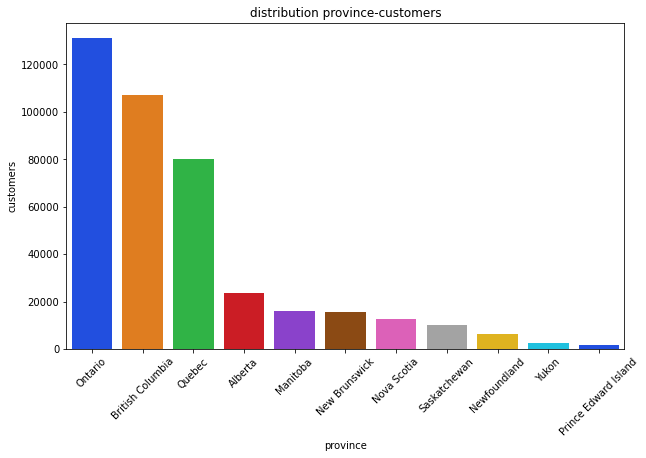

In [96]:
# 3. ¿Cuál es la distribución de los clientes por provincia o estado? province 

customers_province = df_join['province'].value_counts().reset_index()

customers_province .columns = ["province","customers"]

plt.figure(figsize=(10, 6))
sns.barplot(data=customers_province, x='province', y='customers', palette='bright')
plt.title('distribution province-customers')
plt.xlabel('province')
plt.ylabel('customers')
plt.xticks(rotation=45)  
plt.show()

In [100]:
customers_province = df_join['province'].value_counts()
display(customers_province)

Ontario                 130896
British Columbia        106848
Quebec                   79968
Alberta                  23400
Manitoba                 15984
New Brunswick            15432
Nova Scotia              12576
Saskatchewan              9936
Newfoundland              6312
Yukon                     2688
Prince Edward Island      1584
Name: province, dtype: int64

In [63]:
#4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?  education- salary 

salario_promedio_niveledu = df_join.groupby('education')['salary'].mean()
salario_promedio_niveledu

education
Bachelor                72669.31
College                      NaN
Doctor                 178335.44
High School or Below    61126.64
Master                 103767.49
Name: salary, dtype: float64

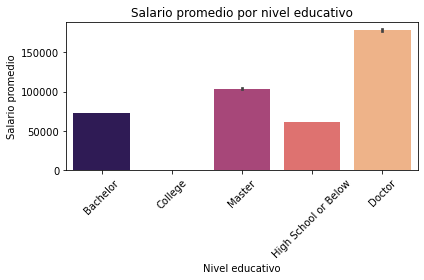

In [62]:
sns.barplot(x = "education", 
            y = "salary", 
            data = df_join,
            palette = "magma")

plt.title('Salario promedio por nivel educativo')
plt.xlabel('Nivel educativo')
plt.ylabel('Salario promedio')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño de la gráfica
plt.show()

In [67]:
# 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?  loyalty_card

proporcion = df_join["loyalty_card"].value_counts()
porcentaje_clientes_fidelidad = (proporcion / len(df_join)) * 100
porcentaje_clientes_fidelidad


Star     45.42
Nova     33.92
Aurora   20.67
Name: loyalty_card, dtype: float64

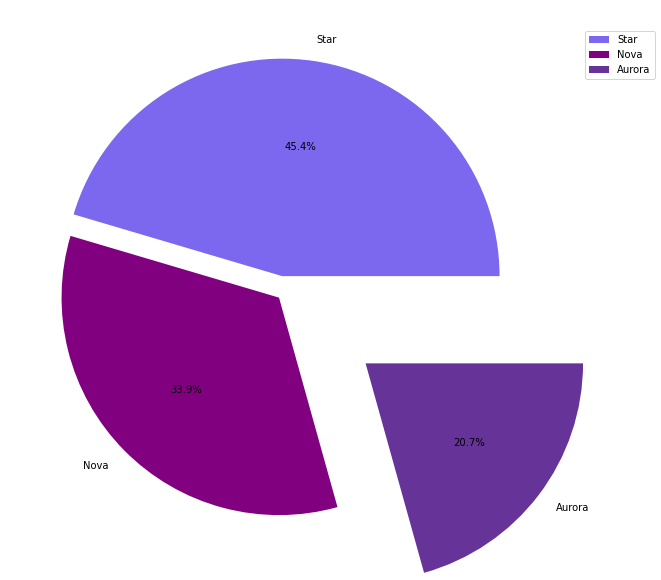

In [81]:
colors = ['mediumslateblue', 'purple', 'rebeccapurple', 'blueviolet' ,'indigo']

explode = (0.1,0, 0.5) 

plt.figure(figsize=(10,10))
plt.pie(proporcion, labels=proporcion.index, autopct='%1.1f%%',colors = colors, explode = explode)
plt.title("Porcentaje clientes según tarjeta de fidelidad", color = "white", fontsize = 16, fontweight = "bold") 
plt.legend(bbox_to_anchor=(1.2, 1)) 
plt.show();

In [82]:
# 6. ¿Cómo se distribuyen los clientes según su estado civil y género? gender - marital_status

gender_marital = df_join.groupby(['gender', 'marital_status']).size().reset_index()
gender_marital

,gender,marital_status,0
0,Female,Divorced,30888
1,Female,Married,117816
2,Female,Single,54936
3,Male,Divorced,30288
4,Male,Married,117984
5,Male,Single,53712


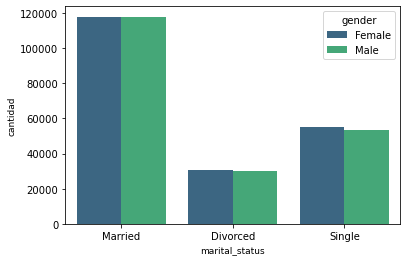

In [83]:
sns.countplot(x = "marital_status", 
              data = df_join, 
              palette = "viridis", 
              hue = "gender")

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()'
plt.xlabel("marital_status", fontsize = 9)
plt.ylabel("cantidad",  fontsize = 9); 